# importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from math import sqrt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the model for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([[3.23553569],
       [1.47272789],
       [1.47469211],
       [2.49774499],
       [1.36324379],
       [1.43501702],
       [1.92149883],
       [2.29465107],
       [2.86008001],
       [3.4207084 ],
       [2.47960126],
       [1.31043762],
       [4.35681939],
       [2.2817877 ],
       [5.18151706],
       [3.4278823 ],
       [2.42644097],
       [0.46844057],
       [3.7901004 ],
       [1.87295956],
       [2.84007765],
       [2.32982024],
       [2.44076184],
       [1.88301353],
       [2.48769101],
       [2.27650735],
       [3.3865526 ],
       [5.18910008],
       [0.49328806],
       [4.78274289],
       [4.36267631],
       [2.82721428],
       [3.25313777],
       [1.86063782],
       [2.89284891],
       [2.76984034],
       [3.25594718],
       [4.70299325],
       [1.29391883],
       [2.48691567],
       [2.42844011],
       [1.87346628],
       [1.30092529],
       [2.84335886],
       [2.52401338],
       [2.48930112],
       [4.35959388],
       [2.830

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [0]:
df_heat

,original_values,Predicted_Values
0,3,3.235536
1,2,1.472728
2,2,1.474692
3,0,2.497745
4,1,1.363244
...,...,...
149,4,3.804421
150,5,4.821228
151,4,3.390243
152,5,4.756677


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.5870199695864005

In [0]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.49260014417708614

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.7661722845329244

Text(0, 0.5, 'Heating Load')

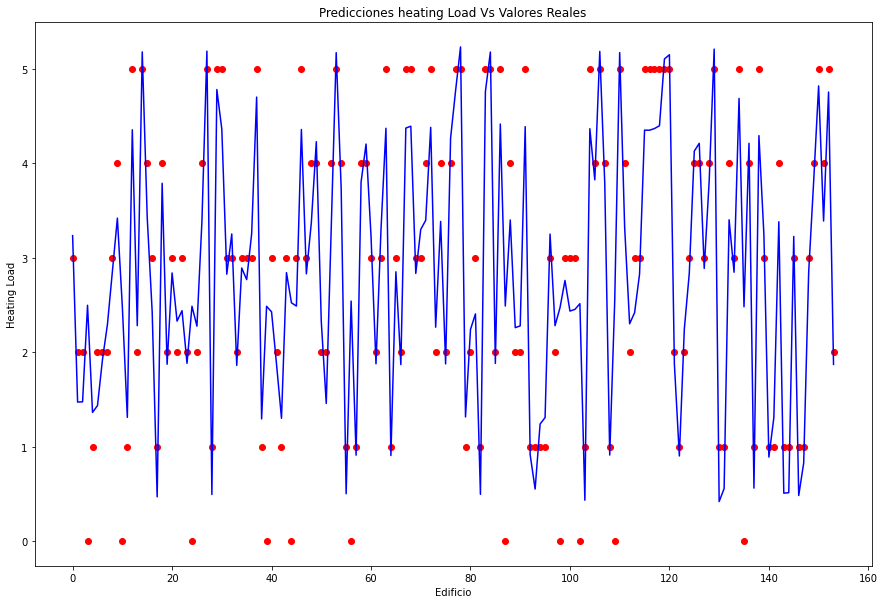

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

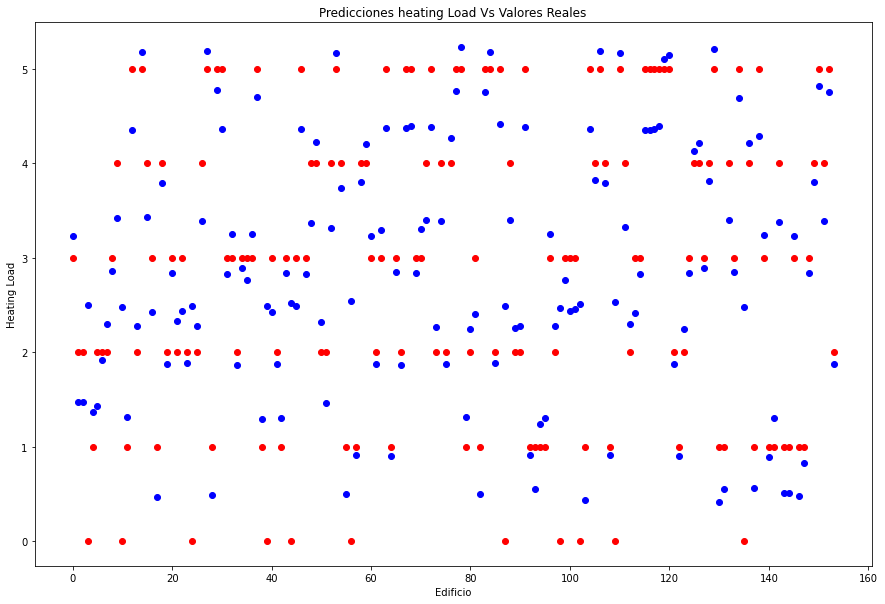

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the model for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Fitting Simple Linear Regression to the Training set
regressor_cooling = LinearRegression()
regressor_cooling.fit(X_train_cooling, y_train_cooling)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting the Test set results
y_pred_cooling = regressor_cooling.predict(X_test_cooling)
y_pred_cooling

array([[17.45627068],
       [ 8.26381341],
       [29.63145167],
       [26.10348821],
       [31.78484077],
       [27.68882449],
       [28.57329108],
       [34.44737957],
       [29.3284274 ],
       [28.07633139],
       [ 7.28946944],
       [35.82430617],
       [11.0591969 ],
       [35.6981637 ],
       [35.24165949],
       [26.16892892],
       [ 9.36242947],
       [27.84099256],
       [15.61523182],
       [12.60000478],
       [13.14610493],
       [31.6326727 ],
       [ 9.44050629],
       [32.69083329],
       [ 6.0126597 ],
       [15.63336079],
       [12.58187581],
       [13.92607245],
       [ 9.66676562],
       [32.23432908],
       [12.48175895],
       [14.39688906],
       [35.57202124],
       [14.54905713],
       [28.44714861],
       [36.91241125],
       [14.23040859],
       [36.60807511],
       [19.10509205],
       [10.04089244],
       [11.38955865],
       [32.63878208],
       [16.43174587],
       [31.18377866],
       [24.30018817],
       [25

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [0]:
df_cooling

,original_values,Predicted_Values
0,15.18,17.456271
1,10.32,8.263813
2,37.26,29.631452
3,16.95,26.103488
4,32.26,31.784841
...,...,...
149,14.33,15.693309
150,28.15,28.116787
151,11.33,11.211365
152,13.86,15.463064


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

10.415538288411224

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

2.223201092076022

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

3.227311309497617

Text(0, 0.5, 'Cooling Load')

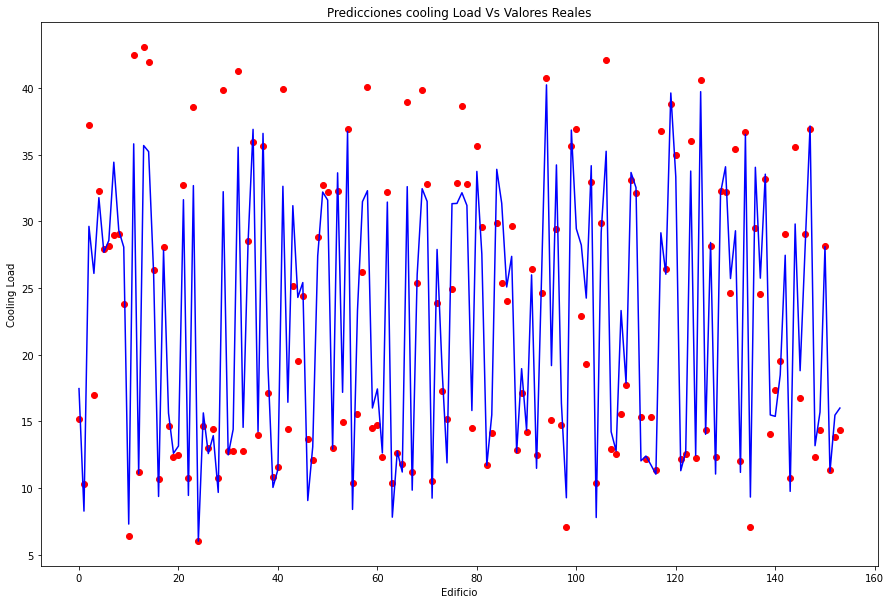

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

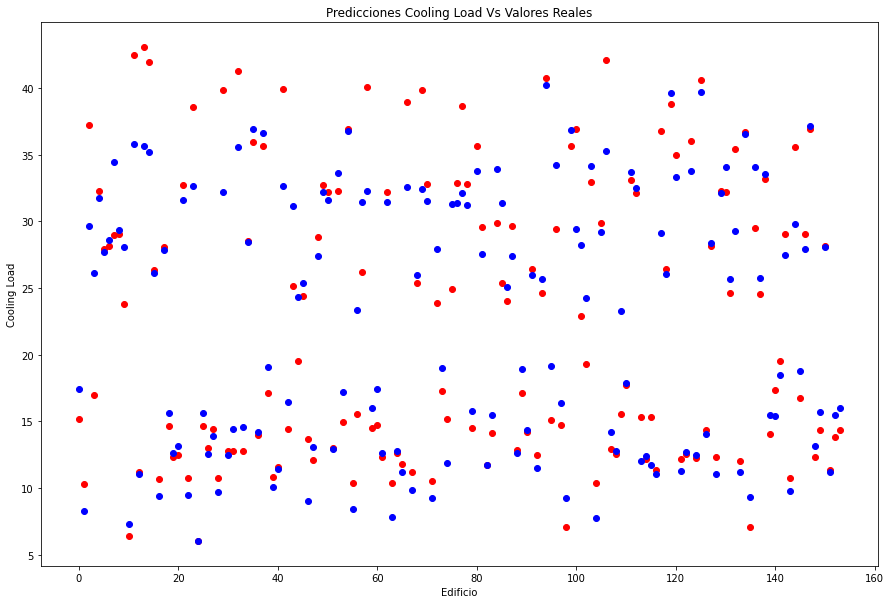

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones Cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')